In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Benjamin Escobar Jaramillo
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [15]:
#Comencemos entonces nuestro camino a la integración!
#a) Usar las funciones implementadas, ambas les ingresa la sintaxis f(y,x), el h esta es en el array de x`s!
#Por definición, vimos que h es el paso, es decir,la distancia entre los x`s, por lo cual usaremos... arange!!

#Comencemos por el calculo nùmero perse con un h=0.01

'''PRIMERA INTERGAL F(x)=e**3x * sin(x)'''
h=0.01
f1=lambda x: np.exp(3*x)*np.sin(x)
x1=np.arange(0, np.pi/4 +h, h) #los limites de integración...
y1=f1(x1) #Nuestras y's

integral1_simpson=simpson(y1,x1)
intergal1_trap=trapezoid(y1,x1)
integral1_exacta=quad(f1,0,np.pi/4)[0] #Solo deseamos el valor!

data1={'h':[h],'Simpson':integral1_simpson,'Trapezoide':intergal1_trap,'Quad':[integral1_exacta]} #Los braquets es para que lo lea como array

uno=pd.DataFrame(data1)
uno

,h,Simpson,Trapezoide,Quad
0,0.01,1.626747,1.626992,1.592098


In [16]:
'''Analogamente vamos con la segunda función'''
f2=lambda x:1/(x*np.log(x))

x2=np.arange(np.e, (1+np.e) +h, h) #nuevos limites
y2=f2(x2) #mismo proceso.

integral2_simpson=simpson(y2,x2)
intergal2_trap=trapezoid(y2,x2)
integral2_exacta=quad(f2,np.e,(1+np.e))[0]

data2={'h':[h],'Simpson':integral2_simpson,'Trapezoide':intergal2_trap,'Quad':[integral2_exacta]}
dos=pd.DataFrame(data2)
dos

,h,Simpson,Trapezoide,Quad
0,0.01,0.272514,0.272515,0.272514


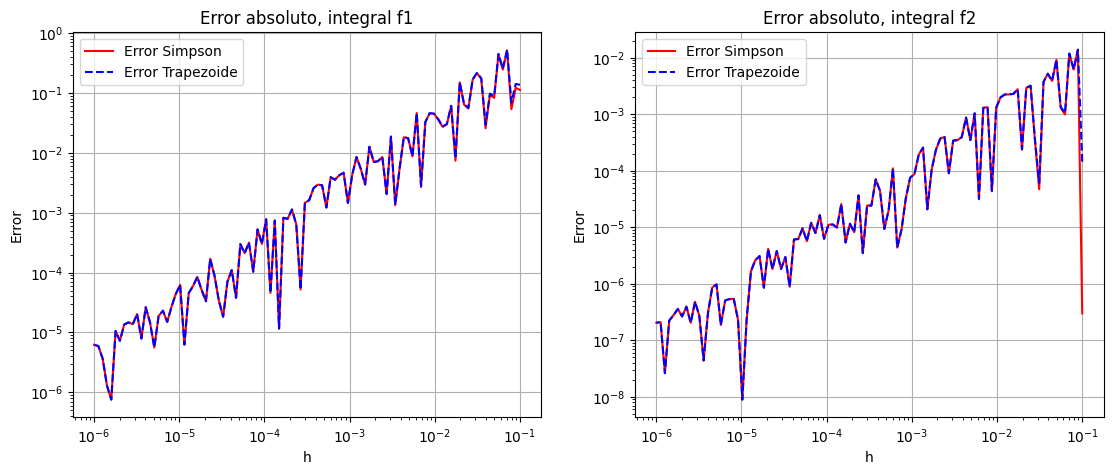

In [17]:
''' Perfecto! Con un h=0.01, en la primera integral vemos... una desviación del valor original. Como bien sospechamos,
con pasos mas pequeños, tenemos una mayor precisión de convergencia. Observemos el fenomeno graficamente con una gráfica
de error absoluto
'''
fig,ax=plt.subplots(1,2,figsize=(13.3,5)) #Clasica forma.

#Ahora nos traemos todo lo que construimos, pero vamos a varíar nuestro h!!

rango=np.logspace(-1,-6,100)#Voilá! muchos h's
error1simpson=[]
error1trap=[]   #Aca guardaremos nuestros errores!

for i in rango:
  h=i                             #Cambiamos el h por iteración
  x1=np.arange(0, np.pi/4 +h, h)
  y1=f1(x1)
  integral1_simpson=simpson(y1,x1)
  integral1_trap=trapezoid(y1,x1)

  error1simpson.append(np.abs(integral1_simpson-integral1_exacta))  #Y guardamos nuestos valores de error!
  error1trap.append(np.abs(integral1_trap-integral1_exacta))

ax[0].plot(rango,error1simpson,label='Error Simpson',c='r')
ax[0].plot(rango,error1trap,label='Error Trapezoide',ls='--',c='b')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set(
    title=('Error absoluto, integral f1'),
    xlabel=('h'),
    ylabel=('Error')
)
ax[0].grid()

################################################################3
'''Analogamente, para f2'''


rango=np.logspace(-1,-6,100)
error2simpson=[]
error2trap=[]

for i in rango:
  h=i
  x2=np.arange(np.e, (1+np.e) +h, h)
  y2=f2(x2)
  integral2_simpson=simpson(y2,x2)
  integral2_trap=trapezoid(y2,x2)

  error2simpson.append(np.abs(integral2_simpson-integral2_exacta))
  error2trap.append(np.abs(integral2_trap-integral2_exacta))

ax[1].plot(rango,error2simpson,label='Error Simpson',c='r')
ax[1].loglog(rango,error2trap,label='Error Trapezoide',ls='--',c='b')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set(
    title=('Error absoluto, integral f2'),
    xlabel=('h'),
    ylabel=('Error'))
ax[1].grid()

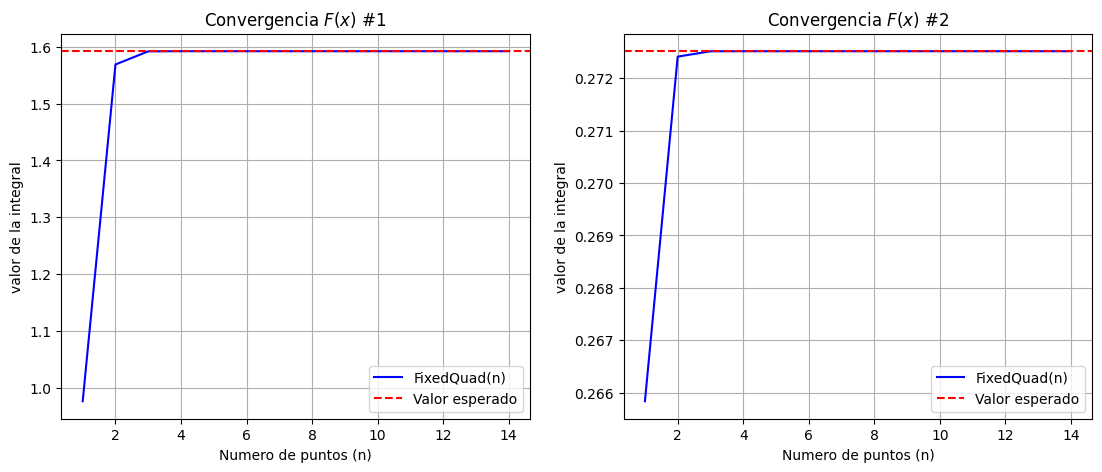

In [9]:
#Bien! Ya vimos como va mejorando nuestra precisíon con respecto a h's mas pequeños.
'''
Ahora, analicemos la convergencia de fixed quad, cambiando el numero de puntos!
En este caso, vamos a tener como valor esperado (referencial) a quad, y veremos a partir de cuantos puntos se estabiliza
'''

#Recordemos que...
f1=lambda x: np.exp(3*x)*np.sin(x)
f2=lambda x:1/(x*np.log(x))

ref1=quad(f1,0,np.pi/4)[0]   #Netas refrencias gráficas
ref2=quad(f2,np.e,(1+np.e))[0]

puntos=np.arange(1,15,1) #Asi de paso, garantizamos que sean ints (enteros)
v1Fixed=[]
v2Fixed=[]

for i in puntos:
  v1Fixed.append(fixed_quad(f1,0,np.pi/4,n=i)[0])
  v2Fixed.append(fixed_quad(f2,np.e,(1+np.e),n=i)[0])

fig,ax=plt.subplots(1,2,figsize=(13.3,5))

ax[0].plot(puntos,v1Fixed,c='b',label='FixedQuad(n)')
ax[0].axhline(y=ref1,linestyle='--',c='r',label='Valor esperado')
ax[0].set(title='Convergencia $F(x)$ #1',xlabel=('Numero de puntos (n)'),ylabel=('valor de la integral'))
ax[0].legend()
ax[0].grid()

ax[1].plot(puntos,v2Fixed,c='b',label='FixedQuad(n)')
ax[1].axhline(y=ref2,linestyle='--',c='r',label='Valor esperado')
ax[1].set(title='Convergencia $F(x)$ #2',xlabel=('Numero de puntos (n)')
,ylabel=('valor de la integral'))
ax[1].legend()
ax[1].grid()

In [19]:
'''
Cuanta eficiencia! Como podemos observar, a partir de tan solo 4 puntos, la gráfica ya converge a un valor estable,
por lo que, 6>p>4 parece un rango realmente razonable para garantizar un resultado muy preciso, y a su vez, optimizado.
'''

'\nCuanta eficiencia! Como podemos observar, a partir de tan solo 4 puntos, la gráfica ya converge a un valor estable,\npor lo que, 6>p>4 parece un rango realmente razonable para garantizar un resultado muy preciso, y a su vez, optimizado.\n'

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [20]:
### Bien! 3 integrales? sin problema! vamos paso por paso, con muchisimo cuidado.
''' Orden es dz dy dx, vamos de adentro, hacia afuera!'''

def integral_z(y,x):                 #Paso 1, definir la integral interior. Como es dz, quedará en funcion de y & x.
  integrando=lambda z: (1/y)*np.sin(z/y)
  res,e=quad(integrando,0,x*y)
  return res

def intergal_y(x):           #paso 2, la integral que sigue, viene de la anterior. como es integral de y, queda en función de x
  integrando=lambda y: integral_z(y,x)
  res,e=quad(integrando,0,x)
  return res

resultado_quad=quad(intergal_y,0,(np.pi))[0]  #Finalmente, lo que obtenemos es como si fuese una única integral!

#Ahora, con el triple quad!
func= lambda z,y,x:(1/y)*np.sin(z/y) #Muchisimo cuiado con el ORDEN INICIAL!!!

c=lambda x:x
d=lambda x:0
                       #Definimos nuestros limites de integración (esta vez de afuera hacia adentro!)
e=lambda x,y: x*y
f=lambda x,y: 0


resultado_Triplequad=tplquad(func,0,np.pi,c,d,e,f)[0] #De afuera (es decir empezamos con las dx) hacia adentro! (terminamos con las dz)

print(f'Con quad, obtuvimos un valor de {resultado_quad}, mientras que con Triple quad, obtuvimos {resultado_Triplequad}')
print(f'Obteniendo una diferencia absoluta de {abs(resultado_Triplequad-resultado_quad)}') #Wow... demasiado exacto jaja

Con quad, obtuvimos un valor de 6.934802200544679, mientras que con Triple quad, obtuvimos 6.934802200544679
Obteniendo una diferencia absoluta de 0.0


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [17]:
'''Bien! para este ajuste, solo tenemos que hacer un sencillo cambio de variable! por lo cual, obtendriamos algo así...'''

def gauss_quad_standard(f,a,b,n=5): #por conveniencia, dejemos el grado del polinomio estandar, pero sin duda es posible cambiarlo.
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Entradas:
      f: la función a integrar (calleable)
      a: limite inferior (float)
      b: limite superior (float)
      n(opcional): grado del polinomio de legendre (int)

    Salidas:
    Aproximación de la integral.

    """
    # Obtener raíces y pesos del polinomio de Legendre, como de costumbre
    x, w = roots_legendre(n)

    # y ahora... la aproximación nueva! (con los cambios de variable)

    integral = np.sum(w * f( (((b-a)/2)*x) + ((a+b)/2) )) #podemos hacer esto sin problema, x y w estan vectorizados!

    integral=integral*((b-a)/2) #Y finalmente, este producto.
    return integral

In [18]:
#Confirmemos con la función más clásica de todas
fgauss=lambda x: np.exp(-x**2)

gauss_quad_standard(fgauss,0,1) #Eureka! parece funcionar.

np.float64(0.7468241267662482)

In [19]:
'''Una vez teniendo una relativa garantía de su funcionamiento, manos a la obra; encontremos la triple integral!'''

def integralz(y,x):
  integrando=lambda z: (1/y)*np.sin(z/y)     #La mas interior, será una función de x & y.
  return gauss_quad_standard(integrando,0,x*y)

def integraly(x):
  integrando=lambda y: integralz(y,x)        #luego solo de x...
  return gauss_quad_standard(integrando,0,x)

integral=gauss_quad_standard(integraly,0,np.pi)

integral
#Huh! acaso la integración iterada encuentra problemas con su funcionamiento interno? (esto es, los polinomios de legendre)

np.float64(9.107318780287503)

In [20]:
def integral_z(y,x):
  integrando=lambda z: (1/y)*np.sin(z/y)
  res,e=quad(integrando,0,x*y)
  return res

def intergal_y(x):
  integrando=lambda y: integral_z(y,x)
  res,e=quad(integrando,0,x)
  return res

resultado_quad=quad(intergal_y,0,(np.pi))[0]
resultado_quad

6.934802200544679

#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [116]:
'''
Bien! como nos piden garantizar un error, olvidemos entonces nuestras funciones asociadas, y empleemos nuestras
precisas habilidades de carpintero computacional para construir estas funciones y asignarles una tolerancia!
'''

######################################################
'''Creemos nuestras funciones'''
f1=lambda x: 1/(np.sqrt(np.tan(x)))
f2=lambda x: (np.cos(x)/(x**3))
f3=lambda y,x: 1/np.sqrt(1-(y**2))


'''
Empleemos las funciones asociadas de SciPy, y comparemos con diferentes h´s! asi hasta llegar a la convergencia solicitada.
Note que la convergenca deseada para simpson y trapezoid solo se empleará en las primeras dos funciones, dada que la tercera
implica una integral Multiple
'''

#A) Trapezoide
def trapezoide_epsilon(f,a,b,tol=1e-5,maxiter=400):
  '''
  Aproxima la integral con una tolerancia dada, a través del metodo del trapezio.
  Entradas:
    f: la función a integrar (calleble)
    a: limite inferior (float)
    b: limite superior (float)
    tol(opcional): Tolerancia (en la forma 1e-n, donde n es un entero)
    maxiter(opcional): maximas iteraciones (estandar de 400) (int)
  Salida:
  La aproximación de la integral con una tolerancia proporcionada
  '''
  n=2
  anterior=99999999999999999 #Simplemente garantiza que en la primera iteración no se cumpla la convergencia en la diferencia (ver adelante)

  for i in range(maxiter):

    h=(b-a)/n  #Aqui iremos actualizando el h
    x=np.arange(a,b+h,h) #y con esto, hacemos cada vez mas pequeño los intervalos!
    y=f(x)

    integral=trapezoid(y,x)

    if abs(anterior-integral)<tol:
      return integral
    else:
      n+=1
      anterior=integral
  return integral #Si llega a maximas iteraciones, devuelve la aproximación del en la ultima iteración

#B) Simpson

def simpson_epsilon(f,a,b,tol=1e-5,maxiter=400):  #Es un análogo identico, pero esta vez, emplea el metodo de simpson!
  '''
  Aproxima la integral con una tolerancia dada a través del método de Simpson.
  Entradas:
    f: la función a integrar (calleble)
    a: limite inferior (float)
    b: limite superior (float)
    tol(opcional): Tolerancia (en la forma 1e-n, donde n es un entero)
    maxiter(opcional): maximas iteraciones (estandar de 400) (int)
  Salida:
  La aproximación de la integral con una tolerancia proporcionada
  '''
  n=2
  anterior=99999999999999999
  for i in range(maxiter):

    h=(b-a)/n  #Aqui iremos actualizando el h
    x=np.arange(a,b+h,h) #y con esto, hacemos cada vez mas pequeño los intervalos!
    y=f(x)

    integral=simpson(y,x)

    if abs(anterior-integral)<tol:
      return integral
    else:
      n+=1
      anterior=integral
  return integral

In [78]:
#Bien, confirmemos como de costumbre que nuestras funciones funcionan! (cuanta redundancia!)
a,b=trapezoide_epsilon(fgauss,0,1),simpson_epsilon(fgauss,0,1)
a,b # Maravilloso! aparentemente, nuestras funciones con una tolerancia preestablecida funionan!

(np.float64(0.7467334282808928), np.float64(0.7468307904598198))

/tmp/ipython-input-116-703139485.py:8: RuntimeWarning: divide by zero encountered in divide
  f1=lambda x: 1/(np.sqrt(np.tan(x)))


(0.0, 10.0)

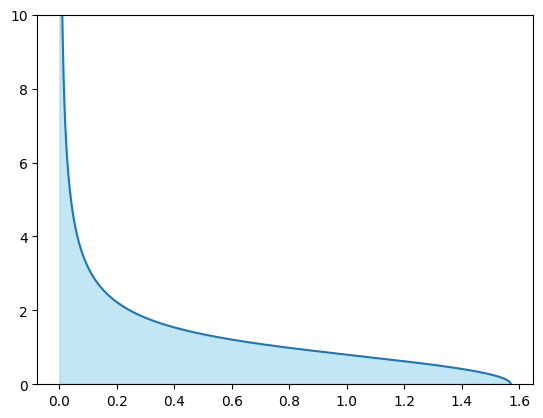

In [161]:
'''
Ahora bien, muchas integrales suelen cerrarse en valores previos a sus limites de integración.
Con el fin de ahorrar en calculos y recursos, visualicemos estas funciones.
'''

x1=np.linspace(0,np.pi/2,1000)
y1=f1(x1)
plt.plot(x1,y1)
plt.fill_between(x1, y1, color='skyblue', alpha=0.5)
plt.ylim(0,10)  #Perfecto! Hallemos entonces esta area

In [164]:
Area1Trap=trapezoide_epsilon(f1,1e-4,1.57) #Como es asintotico, nos acercamos suavemente, pero no la tocamos!!
Area1Simpson=simpson_epsilon(f1,1e-4,1.57)
ValorREAL=2.2214 #(data de WolframApha)
print(f'El metodo de trapezoide nos dió un valor de {round(Area1Trap,4)},y el de Simpson {round(Area1Simpson,4)}, donde el valor Real es {ValorREAL}')

El metodo de trapezoide nos dió un valor de 2.3237,y el de Simpson 2.2709, donde el valor Real es 2.2214


/tmp/ipython-input-116-703139485.py:8: RuntimeWarning: invalid value encountered in sqrt
  f1=lambda x: 1/(np.sqrt(np.tan(x)))


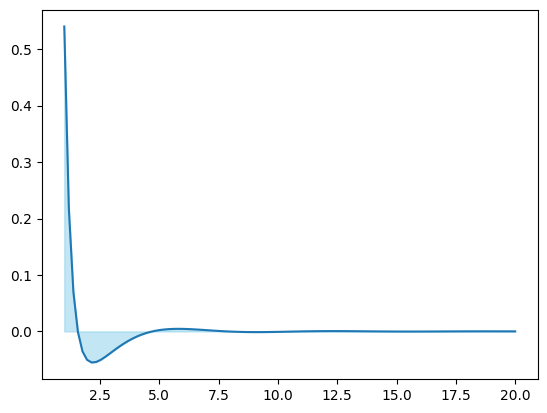

In [165]:
#Ahora comparemos la funcion f2

x2=np.linspace(1,20,100)
y2=f2(x2)
plt.plot(x2,y2)
plt.fill_between(x2, y2, color='skyblue', alpha=0.5)
#plt.ylim(0,10)  #Perfecto! Hallemos entonces esta area

In [168]:
#Como podemos observar, no hay necesidad de irnos hasta el infinito para hacer el calculo!
Area2Trap=trapezoide_epsilon(f2,1,30)
Area2Simpson=simpson_epsilon(f2,1,30)
Valor2REAL=0.01811 #(WolframAlpha)
print(f'El metodo de trapezoide nos dió un valor de {round(Area2Trap,5)},y el de Simpson {round(Area2Simpson,5)}, donde el valor Real es {Valor2REAL}')

El metodo de trapezoide nos dió un valor de 0.01971,y el de Simpson 0.0185, donde el valor Real es 0.01811


In [183]:
#Eureka! nuestras aproximaciones fueorn relativamente aceptables.
'''Ahora bien, para realizar cualesquier aproximación de cuadratura gaussiana, solo aumentar el grado
de su polinomio de legendre asociado! esto es;
'''

def quad_epsilon(f,a,b,tol=1e-5,maxiter=400): #Misma estructura
  n=2
  anterior=99999999999999999
  for i in range(maxiter):

    integral=fixed_quad(f,a,b,n=n)[0]

    if abs(anterior-integral)<tol:
      return integral
    else:
      n+=1  #Aqui actualizamos el grado del polinomio
      anterior=integral
  return integral


In [191]:
quad1=quad_epsilon(f1,0,np.pi/2)
quad2=quad_epsilon(f2,1,30)

print(f'Con el metodo de cuadratura obtenemos valores aproximados de; f1 (aprx={round(quad1,4)}, real={ValorREAL}), y f2 (aprx={round(quad2,4)}, real={Valor2REAL})')

Con el metodo de cuadratura obtenemos valores aproximados de; f1 (aprx=2.2181, real=2.2214), y f2 (aprx=0.0181, real=0.01811)


In [213]:
#Rayos! vemos que cuadratura Gaussiana esta muchísimo mejor optimizado! #Vamos ahora con la doble integral.

'''
Note que para este metodo, se esparaba garantizar la tolerancia cambiando los n del polinomio de lagrange, sin embargo,
Tal parece que fixed quad percibe funciones vectorizadas, lo que no le permite iterar...
'''
n=4
def interna(x):
  integrando=lambda y: 1/np.sqrt(1-(y**2))
  resultado= fixed_quad(integrando, 0, np.sin(x))[0]
  return resultado

final=fixed_quad(interna,0,np.pi/4) [0]

final

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [212]:
'''Pues note como, sin problema alguno, quad resuelve el mismo problema'''
def interna(x):
  integrando=lambda y: 1/np.sqrt(1-(y**2))
  resultado= quad(integrando, 0, np.sin(x))[0]
  return resultado

final=quad(interna,0,np.pi/4) [0]

final

0.30842513753404244

In [ ]:
###Notese ademas que como vimos en los puntos superiores de la actividad, nuestra función gauss_quad_standart no es iterbale
#En multiples integrales.